In [2]:
import pylab as plt
import pandas as pd
import numpy as np

In [3]:
results_df = pd.read_csv('../raw/ae_network_test_results.csv')
results_df.columns = results_df.columns.str.strip()

In [4]:
iter_results_df = pd.read_csv('../raw/LOCAL_mnist_lenet_iter.csv')
iter_results_df.columns = iter_results_df.columns.str.strip()

In [6]:
results_df

,name,subnets,neurons,seed,acc,train_time,test_time
0,lenet-pae-rvfl,1,75,22,0.8970,1.799025,0.231653
1,lenet-pae-rvfl,1,75,432,0.8996,1.616311,0.231116
2,lenet-pae-rvfl,1,75,63,0.9177,1.602776,0.229128
3,lenet-pae-rvfl,1,75,754,0.8998,1.613008,0.230337
4,lenet-pae-rvfl,1,75,3456,0.8936,1.657317,0.240334
...,...,...,...,...,...,...,...
495,lenet-pae-elm,9,1200,5,0.9823,87.706007,0.949556
496,lenet-pae-elm,9,1200,6677,0.9820,87.604015,0.945776
497,lenet-pae-elm,9,1200,876,0.9811,87.659093,0.945361
498,lenet-pae-elm,9,1200,213,0.9822,89.615983,0.959037


## Iterative LeNet

In [7]:
iter_proc_df = iter_results_df.drop(columns=['seed']).groupby('epochs').agg([np.mean,np.std])
iter_proc_df

/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_11702/52109184.py:1: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  iter_proc_df = iter_results_df.drop(columns=['seed']).groupby('epochs').agg([np.mean,np.std])


acc           train_time           test_time     
           mean       std       mean       std      mean  std
epochs                                                       
1       0.97437  0.005867  12.261104  0.189363       0.0  0.0
2       0.97635  0.002448  35.488396  6.903013       0.0  0.0
3       0.97229  0.005034  61.873547  0.403400       0.0  0.0

## LeNet PAE-ELM

In [8]:
pae_elm_df = results_df[results_df['name']=='lenet-pae-elm']
pae_elm_proc_df = pae_elm_df.drop(columns=['seed']).groupby(['subnets', 'neurons']).agg([np.mean,np.std])

/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_11702/1334193521.py:2: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  pae_elm_proc_df = pae_elm_df.drop(columns=['seed']).groupby(['subnets', 'neurons']).agg([np.mean,np.std])


In [9]:
pae_elm_proc_df

acc           train_time           test_time          
                    mean       std       mean       std      mean       std
subnets neurons                                                            
1       75       0.88072  0.012563   1.660215  0.151086  0.246293  0.021284
        150      0.91348  0.006362   1.642232  0.011231  0.228472  0.005604
        300      0.93350  0.005603   1.968703  0.012176  0.230807  0.003949
        600      0.95422  0.001937   2.878897  0.017384  0.243402  0.004543
        1200     0.96465  0.003328   5.557316  0.021810  0.264680  0.007945
3       75       0.93368  0.004488   1.961186  0.016233  0.234586  0.006445
        150      0.95090  0.002945   2.406923  0.012755  0.241756  0.008282
        300      0.96253  0.002836   3.630453  0.024157  0.258552  0.006224
        600      0.97063  0.001495   7.067845  0.011827  0.307011  0.005287
        1200     0.97669  0.002270  17.883676  0.013392  0.393400  0.007292
5       75       0.94482  0.003311   2.429640  0.013021  0.239467  0.005497
        150      0.95896  0.004224   3.284787  0.022141  0.260392  0.005466
        300      0.96697  0.003273   5.632047  0.022185  0.294305  0.005138
        600      0.97459  0.001923  12.564695  0.015651  0.386869  0.004379
        1200     0.97844  0.002010  35.552898  0.016920  0.549455  0.006133
7       75       0.95392  0.003863   2.927273  0.022547  0.251956  0.003656
        150      0.96378  0.002597   4.280502  0.017113  0.285579  0.007568
        300      0.97139  0.002301   7.967754  0.043085  0.342618  0.005138
        600      0.97719  0.002207  19.328749  0.032638  0.482059  0.002937
        1200     0.98021  0.001207  59.157488  0.928178  0.737188  0.006143
9       75       0.95812  0.003846   3.461490  0.019416  0.268429  0.007432
        150      0.96663  0.003028   5.585776  0.437622  0.321584  0.019830
        300      0.97442  0.002485  10.709336  0.036827  0.396122  0.006132
        600      0.97835  0.001851  27.609070  0.033036  0.594744  0.005482
        1200     0.98206  0.001689  88.161976  0.973485  0.952337  0.009610

In [11]:
neurons = [75,150,300,600,1200]
subnets = [1,3,5,7,9]

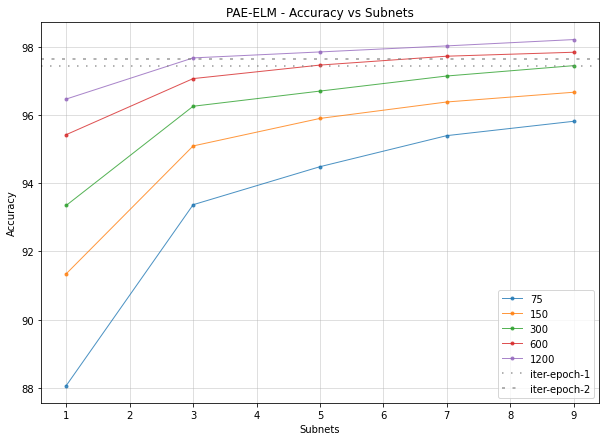

In [12]:
plt.figure(figsize=(10, 7))
plt.title('PAE-ELM - Accuracy vs Subnets')
plt.xlabel('Subnets')
plt.ylabel('Accuracy')

for size in neurons:
    data = pae_elm_proc_df.loc[(slice(None), size), :]['acc']['mean'].values*100
    plt.plot(subnets, data, 'o-', linewidth=1, markersize=3, alpha=0.8)

plt.axhline(iter_proc_df.iloc[0]['acc']['mean']*100, color='grey', linestyle=(0,(1,5)), alpha=0.8)
plt.axhline(iter_proc_df.iloc[1]['acc']['mean']*100, color='grey', linestyle=(0,(2,5)), alpha=0.8)

plt.grid(which='both', alpha=0.5)
plt.legend(neurons+['iter-epoch-1', 'iter-epoch-2'])

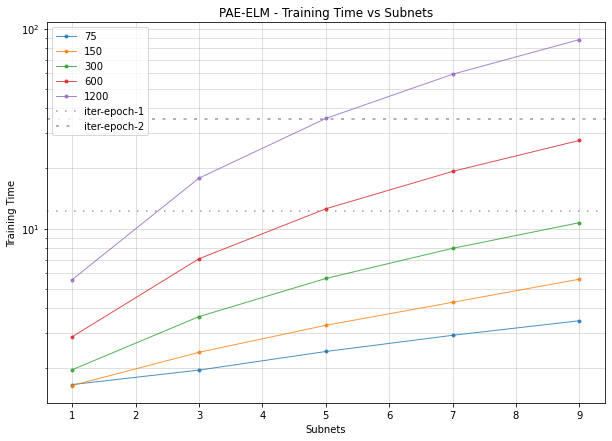

In [13]:
plt.figure(figsize=(10, 7))
plt.title('PAE-ELM - Training Time vs Subnets')
plt.xlabel('Subnets')
plt.ylabel('Training Time')

for size in neurons:
    data = pae_elm_proc_df.loc[(slice(None), size), :]['train_time']['mean'].values
    plt.plot(subnets, data, 'o-', linewidth=1, markersize=3, alpha=0.8)

plt.axhline(iter_proc_df.iloc[0]['train_time']['mean'], color='grey', linestyle=(0,(1,5)), alpha=0.8)
plt.axhline(iter_proc_df.iloc[1]['train_time']['mean'], color='grey', linestyle=(0,(2,5)), alpha=0.8)

plt.yscale('log')
plt.grid(which='both', alpha=0.5)
plt.legend(neurons+['iter-epoch-1', 'iter-epoch-2'])

## LeNet PAE-RVFL

In [14]:
pae_rvfl_df = results_df[results_df['name']=='lenet-pae-rvfl']
pae_rvfl_proc_df = pae_rvfl_df.drop(columns=['seed']).groupby(['subnets', 'neurons']).agg([np.mean,np.std])
pae_rvfl_proc_df

/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_11702/675914418.py:2: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  pae_rvfl_proc_df = pae_rvfl_df.drop(columns=['seed']).groupby(['subnets', 'neurons']).agg([np.mean,np.std])


acc            train_time           test_time          
                    mean       std        mean       std      mean       std
subnets neurons                                                             
1       75       0.90008  0.009150    1.638446  0.062773  0.230509  0.004156
        150      0.92587  0.006161    1.855520  0.012836  0.233911  0.003265
        300      0.93969  0.003418    2.626180  0.026458  0.272189  0.003360
        600      0.23203  0.092626    4.969279  0.029631  0.305876  0.003671
        1200     0.13957  0.051752   12.212203  0.024167  0.332034  0.005043
3       75       0.93633  0.003745    2.231229  0.022726  0.247593  0.009972
        150      0.95141  0.002614    3.319449  0.364711  0.283509  0.015620
        300      0.96156  0.004434    5.663764  0.345930  0.327529  0.019720
        600      0.12522  0.035100   13.158681  0.060636  0.440447  0.005045
        1200     0.11746  0.049918   38.179029  0.939887  0.615241  0.005053
5       75       0.94762  0.005056    2.957829  0.011624  0.274263  0.003116
        150      0.96047  0.003298    4.363694  0.021359  0.312226  0.003428
        300      0.96723  0.002925    8.613241  0.037185  0.383045  0.003041
        600      0.12361  0.035943   22.496623  0.191466  0.549438  0.049285
        1200     0.10624  0.014883   69.145401  0.627599  0.950552  0.013897
7       75       0.95590  0.003715    3.658121  0.015613  0.292169  0.005094
        150      0.96354  0.003011    5.783645  0.033305  0.344021  0.003485
        300      0.97109  0.002342   12.232149  0.199856  0.481903  0.012154
        600      0.10251  0.016319   32.926745  0.079666  0.649134  0.003964
        1200     0.10439  0.024836  105.751767  0.092357  1.319671  0.009984
9       75       0.95981  0.002588    4.371372  0.014395  0.315941  0.005002
        150      0.96764  0.001845    7.321699  0.033183  0.384245  0.004568
        300      0.97422  0.002858   16.202061  0.325414  0.573057  0.003569
        600      0.12072  0.041593   45.103597  0.215358  0.813998  0.006244
        1200     0.10692  0.016971  148.545625  1.106657  1.711637  0.012892

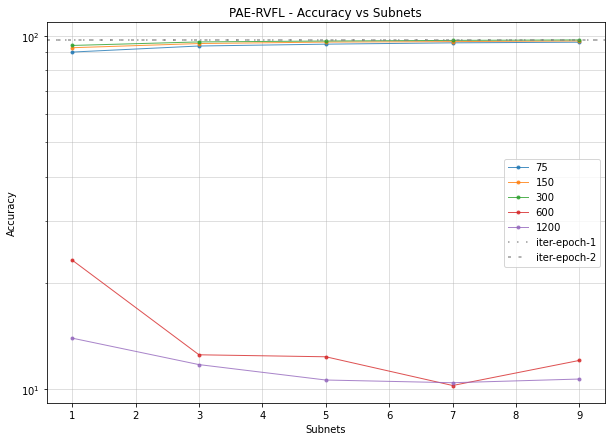

In [15]:
plt.figure(figsize=(10, 7))
plt.title('PAE-RVFL - Accuracy vs Subnets')
plt.xlabel('Subnets')
plt.ylabel('Accuracy')

for size in neurons:
    data = pae_rvfl_proc_df.loc[(slice(None), size), :]['acc']['mean'].values*100
    plt.plot(subnets, data, 'o-', linewidth=1, markersize=3, alpha=0.8)

plt.axhline(iter_proc_df.iloc[0]['acc']['mean']*100, color='grey', linestyle=(0,(1,5)), alpha=0.8)
plt.axhline(iter_proc_df.iloc[1]['acc']['mean']*100, color='grey', linestyle=(0,(2,5)), alpha=0.8)

plt.yscale('log')
plt.grid(which='both', alpha=0.5)
plt.legend(neurons+['iter-epoch-1', 'iter-epoch-2'])

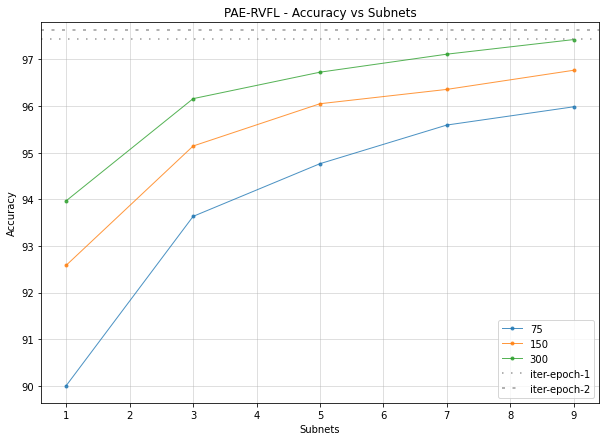

In [19]:
plt.figure(figsize=(10, 7))
plt.title('PAE-RVFL - Accuracy vs Subnets')
plt.xlabel('Subnets')
plt.ylabel('Accuracy')

for size in neurons[:-2]:
    data = pae_rvfl_proc_df.loc[(slice(None), size), :]['acc']['mean'].values*100
    plt.plot(subnets, data, 'o-', linewidth=1, markersize=3, alpha=0.8)

plt.axhline(iter_proc_df.iloc[0]['acc']['mean']*100, color='grey', linestyle=(0,(1,5)), alpha=0.8)
plt.axhline(iter_proc_df.iloc[1]['acc']['mean']*100, color='grey', linestyle=(0,(2,5)), alpha=0.8)

plt.grid(which='both', alpha=0.5)
plt.legend(neurons[:-2]+['iter-epoch-1', 'iter-epoch-2'])

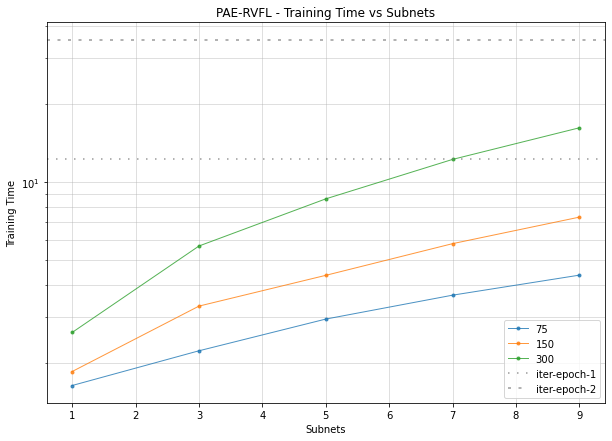

In [18]:
plt.figure(figsize=(10, 7))
plt.title('PAE-RVFL - Training Time vs Subnets')
plt.xlabel('Subnets')
plt.ylabel('Training Time')

for size in neurons[:-2]:
    data = pae_rvfl_proc_df.loc[(slice(None), size), :]['train_time']['mean'].values
    plt.plot(subnets, data, 'o-', linewidth=1, markersize=3, alpha=0.8)

plt.axhline(iter_proc_df.iloc[0]['train_time']['mean'], color='grey', linestyle=(0,(1,5)), alpha=0.8)
plt.axhline(iter_proc_df.iloc[1]['train_time']['mean'], color='grey', linestyle=(0,(2,5)), alpha=0.8)

plt.yscale('log')
plt.grid(which='both', alpha=0.5)
plt.legend(neurons[:-2]+['iter-epoch-1', 'iter-epoch-2'])